# ECE3200J
Author: Minjie Mao


In [10]:
from scipy import constants as const
import scipy.integrate as integrate
import scipy
import numpy as np
import math

## Chapter 1 The Crystal Structure of Solids
### Basic Crystal Strutures
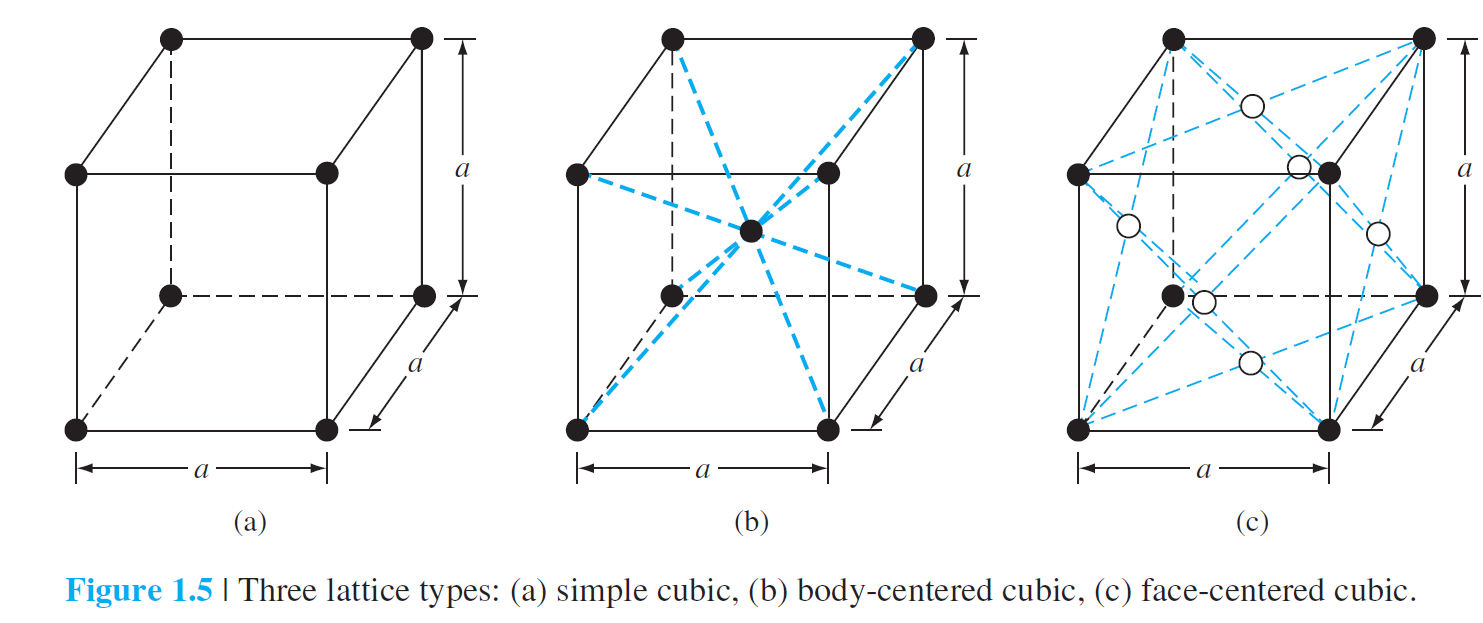

### Miller Indices
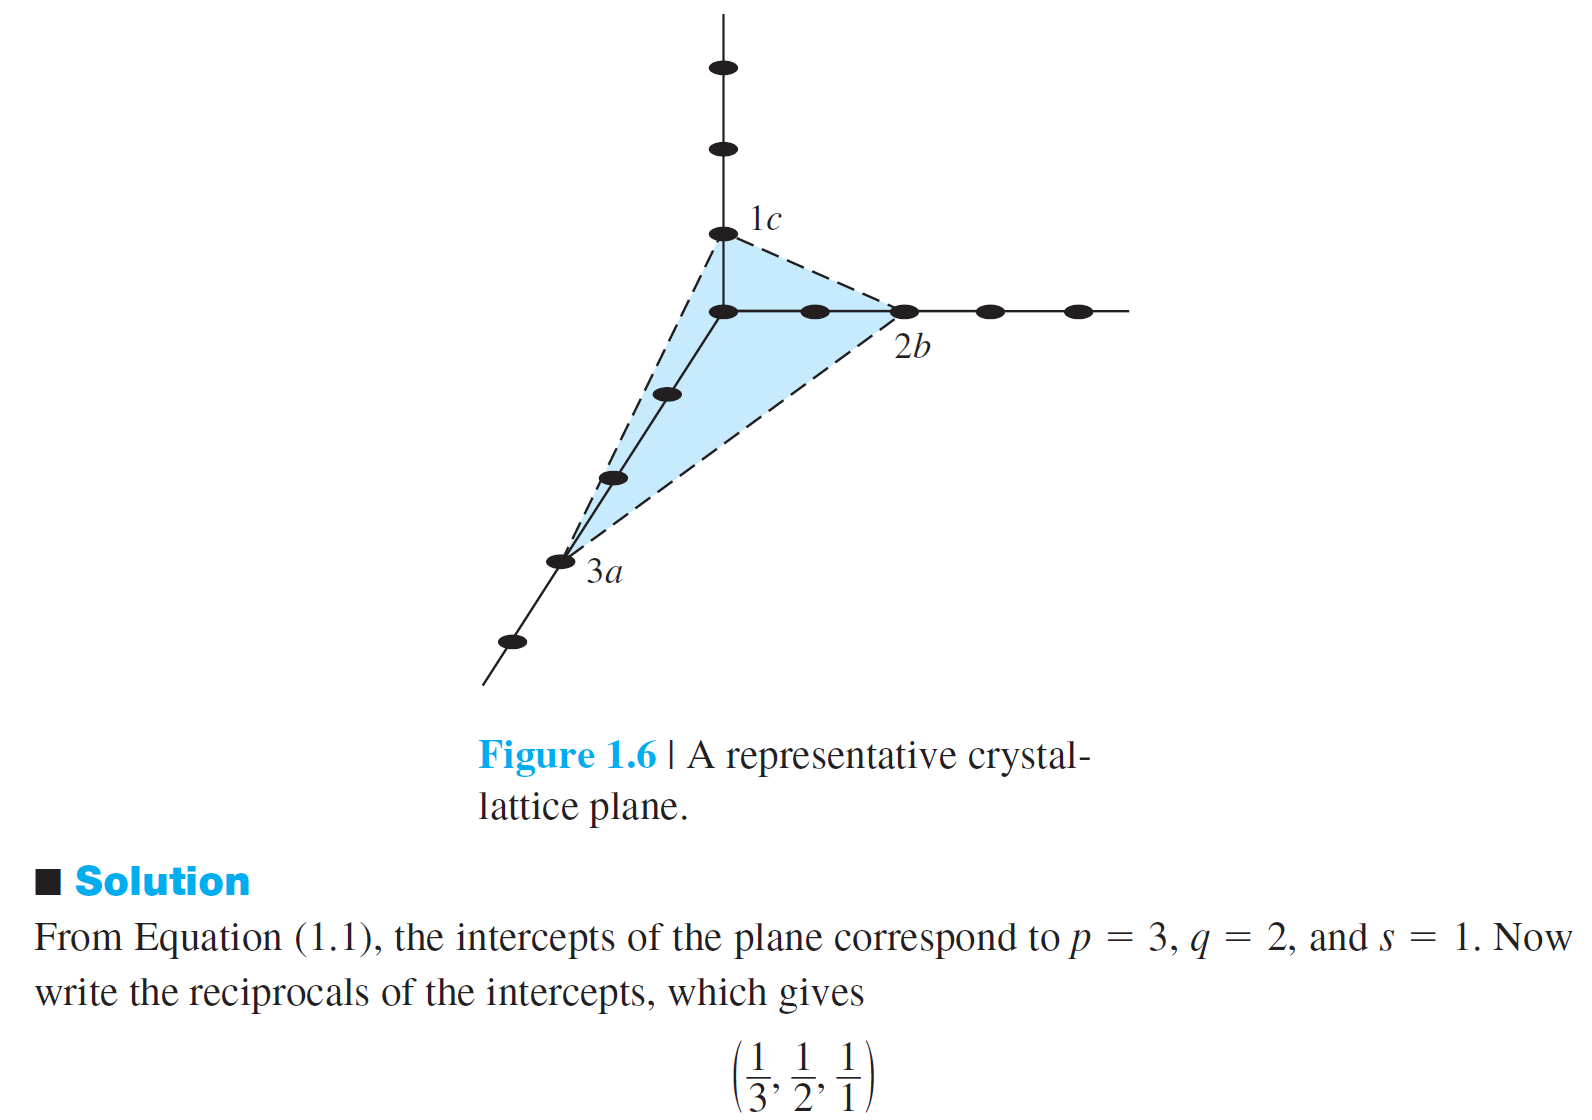

In [11]:
def volume_density(n, side):
    density = n / pow(side, 3)
    print(f"volume density: {density:e}")
    return density

volume_density(1, 1)

volume density: 1.000000e+00


1.0

In [12]:
def surface_density(n, side):
    density = n / pow(side, 2)
    print(f"surface density: {density:e}")
    return density

surface_density(1, 1)

surface density: 1.000000e+00


1.0

### Direction in Crystal
In addition to describing crystal planes in a lattice, we may want to describe a particular
direction in the crystal. The direction can be expressed as a set of three integers
that are the components of a vector in that direction. For example, the body diagonal
in a simple cubic lattice is composed of vector components 1, 1, 1. The body
diagonal is then described as the [111] direction. The brackets are used to designate
direction as distinct from the parentheses used for the crystal planes

## Chapter 2 Introduction to Quantum Mechanics
### Second Order Differential Equations
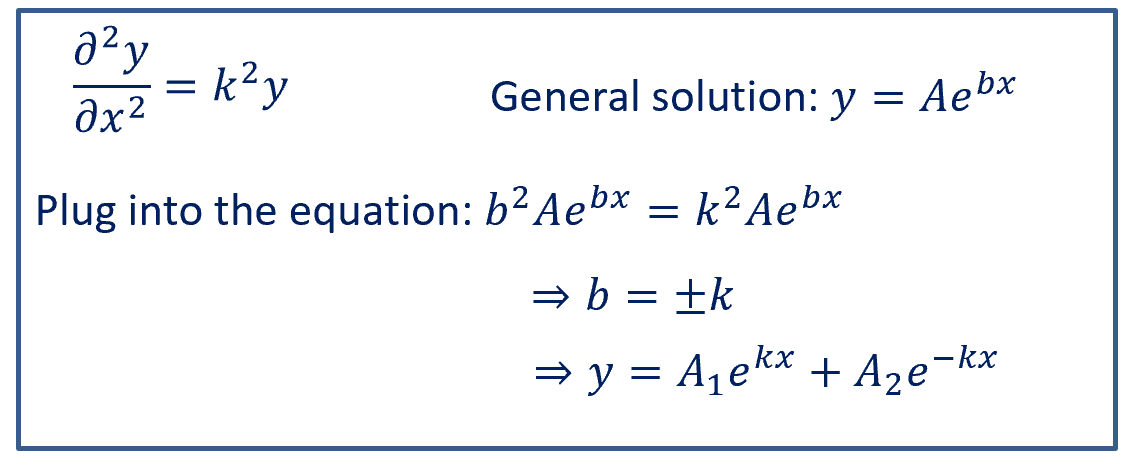
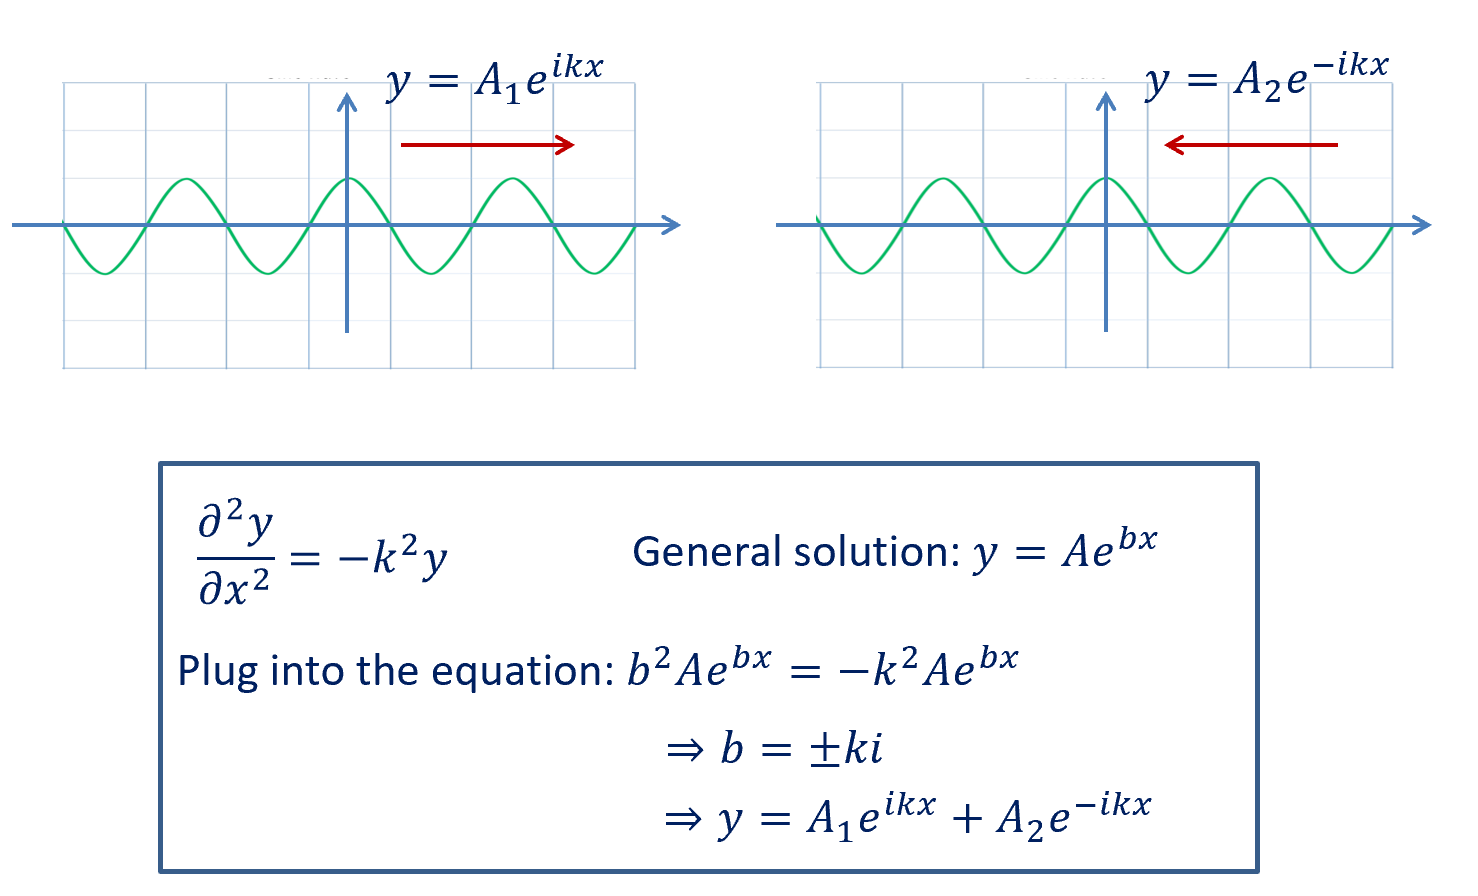
### Principles of Quantum Mechanics
Energy: $$E=h \nu = \hbar \omega$$
Momentum: $$p = mc = \frac{E}{c} = \frac{h \nu}{c} = \frac{h}{\lambda} = \frac{\hbar}{k}$$

In [13]:
def energy(nu):
    E = const.h * nu
    print(f"Energy: {E:e}")
    return E

energy(1)

Energy: 6.626070e-34


6.62607015e-34

In [14]:
def nu_lambda(x):
    result = const.c / x
    print(f"If x is lambda, nu: {result:e}; If x is nu, lambda: {result:e};")
    return result

# nu_lambda(3)

def momentum(lamb):
    p = const.h / lamb
    print(f"Momentum: {p:e}")
    return p

# momentum(1)

### Schrodinger's Wave Equation

$$
-\frac{\hbar^2}{2 m} \frac{\partial^2 \Psi}{\partial x^2}+V(x) \Psi=E \Psi
$$

#### Probability Function

$$
|\Psi(x, t)|^2=\psi(x) \psi^*(x)=|\psi(x)|^2
$$

$$
\int ^\infty_{-\infty} |\psi(x)|^2 = 1
$$

**Boundary Condition**

- Condition 1. $\phi (x)$ must be finite, single-valued, and continuous.

- Condition 2. $\frac{\partial \phi (x)}{\partial x}$ must be finite, single-valued, and continuous.

In [15]:
def func(x):
    """function to be integrated
    Args:
        x (float): variable
    """
    A = math.sqrt(2) / 2
    return A ** 2 * (math.cos(math.pi * x) + 1) / 2

# Integrate the function from x to y
integrate.quad(func, 0, 1 / 2)[0]

0.20457747154594774

#### Infinite Potential Well

$$
E=\frac{k^2\hbar^2}{2m}, \quad k = \frac{n \pi}{a}
$$


In [16]:
def energy_level(a):
    """
    Args:
        a: the unit is meter

    Returns:
        E: the unit is J
    """
    n = np.arange(10)
    k = n * np.pi / a
    E = pow(k * const.hbar, 2) / (2 * const.m_e)
    print(f"E: {E}")
    return E 

energy_level(12e-10)

E: [0.00000000e+00 4.18379681e-20 1.67351872e-19 3.76541713e-19
 6.69407489e-19 1.04594920e-18 1.50616685e-18 2.05006044e-18
 2.67762996e-18 3.38887541e-18]


array([0.00000000e+00, 4.18379681e-20, 1.67351872e-19, 3.76541713e-19,
       6.69407489e-19, 1.04594920e-18, 1.50616685e-18, 2.05006044e-18,
       2.67762996e-18, 3.38887541e-18])

## Chapter 3 Introduction to the Quantum Theory of Solids

### Effective Mass

$$
\frac{1}{\hbar} \frac{d E}{d k}=\frac{p}{m}=v
$$

$$
\frac{1}{\hbar^2} \frac{d^2 E}{d k^2}=\frac{2C_1}{\hbar^2}= \frac{1}{m^*}
$$

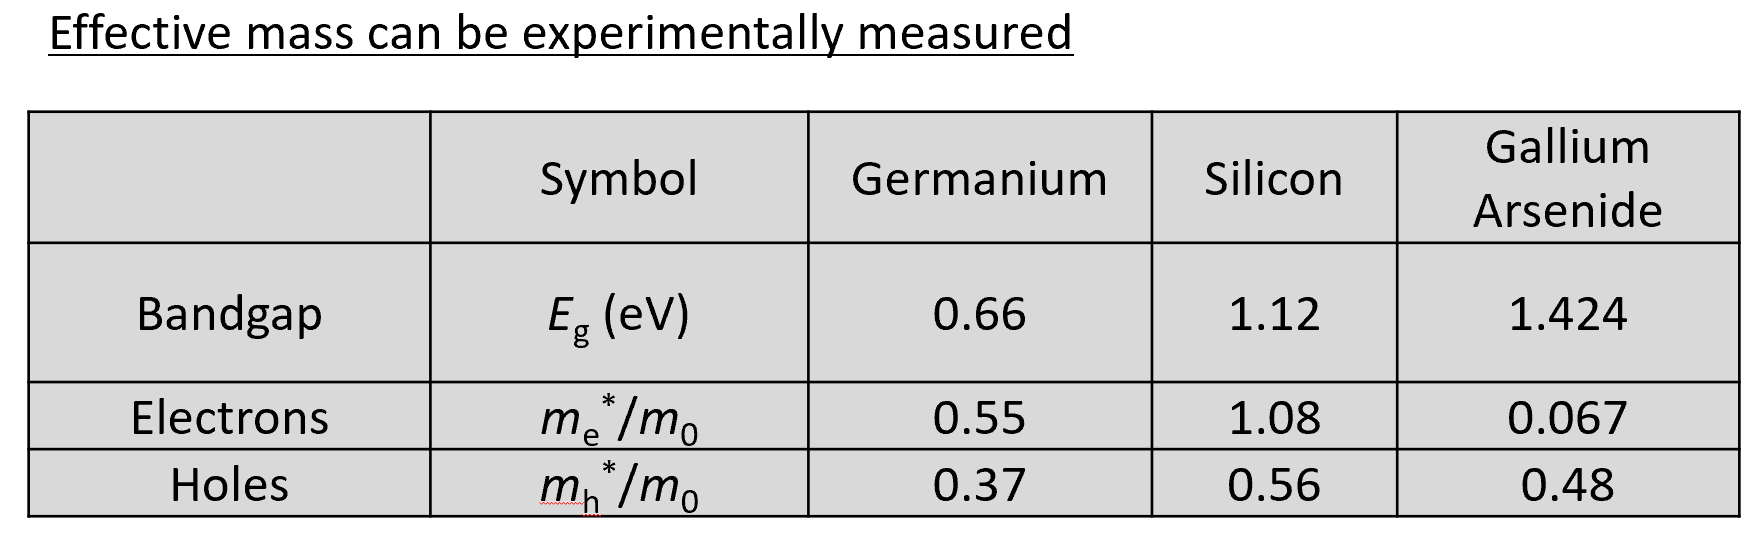

In [25]:
m_e_eff = 1.08 * const.m_e
m_h_eff = 0.56 * const.m_e
m_p_eff = m_h_eff
E_g = 1.12

def effective_mass(C):
    m_eff = const.hbar ** 2 / 2 / C
    print(f"Effective Mass: {m_eff:e}")
    return m_eff

effective_mass(1)

Effective Mass: 5.560609e-69


5.560608592867591e-69

### Density of the States Function

$$
g_c(E)=\frac{4 \pi\left(2 m_n^*\right)^{3 / 2}}{h^3} \sqrt{E-E_c}
$$

$$
g_v(E)=\frac{4 \pi\left(2 m_p^*\right)^{3 / 2}}{h^3} \sqrt{E_v-E}
$$

In [18]:
def state_density(E, m):
    density = 4 * math.pi * pow(2 * m, 3 / 2) / pow(const.h, 3) * math.sqrt(E)
    # print(f"State density: {density:e}")
    return density

integrate.quad(state_density, 0, 3 * const.k * 400, args=m_p_eff)[0]

6.328602773029837e+25

### Statistical Mechanics

#### The Fermi-Dirac Probability Function

The number density $N ( E )$ is the number of particles per unit volume per unit energy
and the function $g ( E )$ is the number of quantum states per unit volume per unit energy.
The function $f_F ( E )$ is called the Fermi–Dirac distribution or probability function
and gives the probability that a quantum state at the energy E will be occupied
by an electron. The energy $E_F$ is called the Fermi energy.

$$
\frac{N(E)}{g(E)}=f_F(E)=\frac{1}{1+\exp \left(\frac{E-E_F}{k T}\right)}
$$

**Maxwell-Boltzmman Approximation**
$$
f_F(E) \approx \exp \left[\frac{-\left(E-E_F\right)}{k T}\right]
$$

In [24]:
def prob(deltaE, T):
    # deltaE = E - E_f, unit: J
    f = 1 / (1 + math.exp(deltaE / (const.k * T)))
    print(f"State probability: {f:e}")
    return f

prob(0.16 * const.e, 300)

def approx_prob(deltaE, T):
    f = math.exp(-deltaE / (const.k * T))
    print(f"Approximate State probability: {f:e}")
    return f

approx_prob(0.16 * const.e, 300)

State probability: 2.047520e-03
Approximate State probability: 2.051721e-03


0.0020517209883802517

## Chapter 4 The Semiconductor in Equilibrium

### Charge Carriers in Semiconductor

We may define a parameter $N_c$ as

$$
N_c=2\left(\frac{2 \pi m_n^* k T}{h^2}\right)^{3 / 2}
$$

The parameter $m_n^*$ is the density of states effective mass of the electron. The thermal equilibrium electron concentration in the conduction band can be written as

$$
n_0=N_c \exp \left[\frac{-\left(E_c-E_F\right)}{k T}\right]
$$

We may define a parameter $N_v$ as

$$
N_v=2\left(\frac{2 \pi m_p^* k T}{h^2}\right)^{3 / 2}
$$

which is called the effective density of states function in the valence band. The parameter $m_p^*$ is the density of states effective mass of the hole. The thermal equilibrium concentration of holes in the valence band may now be written as

$$
p_0=N_v \exp \left[\frac{-\left(E_F-E_v\right)}{k T}\right]
$$

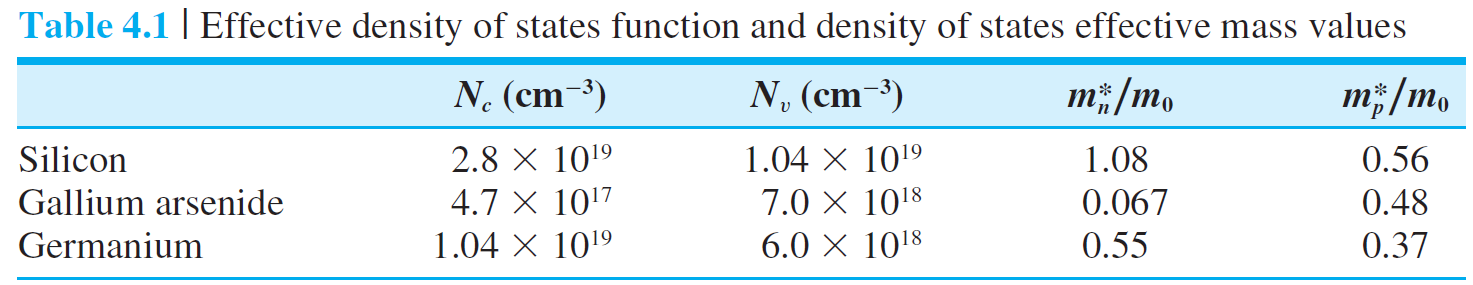

$$
n_i^2=N_c N_v \exp \left[\frac{-\left(E_c-E_v\right)}{k T}\right]=N_c N_v \exp \left[\frac{-E_g}{k T}\right]
$$

where $E_g$ is the bandgap energy. For a given semiconductor material at a constant temperature, the value of $n_i$ is a constant, and independent of the Fermi energy.

**The intrinsic Fermi Energy Position**

$$
E_{F i}-E_{\text {midgap }}=\frac{3}{4} k T \ln \left(\frac{m_p^*}{m_n^*}\right)
$$

### The Extrinsic Semiconductor

$$
n_0=n_i \exp \left[\frac{E_F-E_{F i}}{k T}\right]
$$

$$
p_0=n_i \exp \left[\frac{-(E_F-E_{F i})}{k T}\right]
$$

In [44]:
N_c = 2.8e19
N_v = 1.04e19
E_g = 1.12
n_i=1.5e10

def get_n0(E_c, E_F, T=300, N_c=2.8e19):
    n_0 = N_c * math.exp(-(E_c - E_F) / (const.k * T))
    print(f"n_0: {n_0:e}")
    return n_0

# def get_n0(p_0, n_i=1.5e10):
#     n_0 = n_i ** 2 / p_0
#     print(f"n_0: {n_0:e}")
#     return n_0

get_n0(0.922 * const.e, 0)

def get_p0(E_v, E_F, T=300, N_v=1.04e19):
    p_0 = N_v * math.exp(-(E_F - E_v) / (const.k * T))
    print(f"p_0: {p_0:e}")
    return p_0

get_p0(0.922 * const.e, 0)


n_0: 9.083218e+03
p_0: 3.205912e+34


3.20591223466167e+34

In [46]:
def get_deltaE(x, T=300):
    deltaE = const.k * T * math.log(x)
    print(f"deltaE: {deltaE:e}")
    return deltaE

In [48]:
def E_fi_position(x, T=300):
    diff = 3 * get_deltaE(x, T) / 4
    print(f"E_fi- E_mid: {diff:e}")
    print(diff)